### Importing Packages

In [1]:
# importing the Dataset

import pandas as pd
import re
import nltk
import os
import glob
import re

import seaborn as sns
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [2]:
df = pd.read_csv('Stock.csv', encoding = "ISO-8859-1")
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


### Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

In [4]:
df['Date'] = pd.to_datetime(df['Date'].str.strip(), format='%Y/%m/%d')
df.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
df.fillna(' ',inplace = True)

##### Renaming column names for ease of access

In [5]:
Headline_Cols= [str(i) for i in range(25)]
column_names = ['Date','Label']
column_names.extend(Headline_Cols)
new_Index=[i for i in column_names]
df.columns= new_Index
##Converting to lower cases
df.apply(lambda x: x.astype(str).str.lower())
df

,Date,Label,0,1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,2000-01-03,0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland shocked by xenophobic abuse of Poles ...,There will be no second referendum cabinet ag...,Scotland welcome to join EU Merkel ally says,Sterling dips below Friday s year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U K Following U K...,...,German lawyers to probe Erdogan over alleged w...,Boris Johnson says the UK will continue to in...,Richard Branson is calling on the UK governmen...,Turkey sorry for downing Russian jet,Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don t wan...,Conservative MP Leave Campaigner The leave c...,Economists predict UK recession further weake...,New EU superstate plan by France Germany Cr...,Pakistani clerics declare transgender marriage...
4097,2016-06-28,1,Scientists To Australia If You Want To ...,The personal

#####  Concatenating all news and stemming them

In [6]:
stemmer = PorterStemmer()
headlines = []
for row in range(0,len(df.index)):
    headlines.append(' '.join(str(x) for x in set(df.loc[row,Headline_Cols])))
    

##### Stemming the records

In [7]:
for i in range(0,len(headlines)):
    words = nltk.word_tokenize(headlines[i])
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    headlines[i] = ' '.join(words)

df = df.drop(columns = Headline_Cols)

##### Creating the Bag of Words model

In [8]:
cv = CountVectorizer(max_features=4000,ngram_range=(2,2))
headlines_df = cv.fit_transform(headlines).toarray()
headlines_df = pd.DataFrame(headlines_df, columns = cv.get_feature_names() )
df = df.join(headlines_df)
df['Label'] = df['Label'].map({0:'Down', 1:'Up'})

##### Breaking data into Train and Test for Model

In [9]:
train = df.iloc[:3000,:]
test = df.iloc[3000:,:]
train = train.drop(columns = 'Date')
test = test.drop(columns = 'Date')


X_train = train.iloc[:,1:]
y_train = train.loc[:,'Label']

X_test = test.iloc[:,1:]
y_test = test.loc[:,'Label']

#### Hyperparametertuning

In [10]:
def model_hyperparameter_tuning(X,y):
    model_params = {
        'Random_Forest': {
            'model': RandomForestClassifier(),
            'params' : {
                'n_estimators': [20,40,60,80,100,120,140,160,180],
                'criterion': ['gini','entropy']
            }
        },
        'naive_bayes_multinomial': {
           'model': MultinomialNB(),
           'params': {}
         },
        'Decision_Tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini','entropy'],  
                'splitter' : ['best','random'],
                'min_samples_leaf' : [20,40,60,80,100,120,140,160,180]
            }
        }, 
        'SVM': {
            'model': svm.SVC(gamma='auto'),
            'params' : {
                'C': list(range(1,10)),
                'kernel': ['rbf','linear']
            }  
        }
    }
    scores = []

    for model_name, mp in model_params.items():
        print('Running ' + model_name)
        clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(X, y)
        scores.append({
            'model': model_name,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_,
            'best_estimators' : clf.best_estimator_
        })
    hyperparameter_tuning_results = pd.DataFrame(scores,columns=['model','best_score','best_params','best_estimators'])
    return hyperparameter_tuning_results

Results = model_hyperparameter_tuning(X_train,y_train)


Running Random_Forest
Running naive_bayes_multinomial
Running Decision_Tree
Running SVM


#### Getting best estimators

In [13]:
Results.sort_values(by = 'best_score', inplace = True, ascending = False)
Results = Results.reset_index(drop = True)
best_estimator  = Results.loc[0,'best_estimators']
best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict(X_test)
best_estimator

DecisionTreeClassifier(min_samples_leaf=140)

#### Accuracy

              precision    recall  f1-score   support

        Down       0.00      0.00      0.00       518
          Up       0.53      1.00      0.69       583

    accuracy                           0.53      1101
   macro avg       0.26      0.50      0.35      1101
weighted avg       0.28      0.53      0.37      1101

Accuracy: 0.5295186194368756


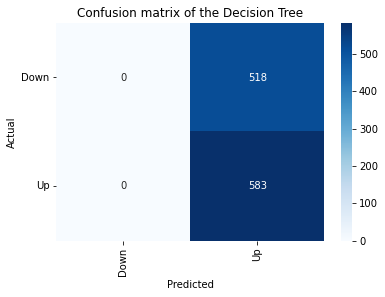

In [12]:
labels = list(set(y_train))
labels.sort()
rf_cm = confusion_matrix(y_test,y_pred, labels = labels)
ax= plt.subplot()
sns.heatmap(rf_cm, annot=True, ax = ax,cmap='Blues',fmt="d"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion matrix of the Decision Tree'); 
ax.xaxis.set_ticklabels(labels,rotation = 90); 
ax.yaxis.set_ticklabels(labels,rotation = 0);

print(classification_report(y_test, y_pred))

print("Accuracy:",best_estimator.score(X_test, y_test))